<a href="https://colab.research.google.com/github/trunfo4608/Python-Analise_Restaurante/blob/main/Proj_Analise_Dados_Restaurante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
 sub_set = df.rename(
    columns={
        'total_bill':'TOTAL PAGO',
        'tip': 'GORJETA',
        'sex':'SEXO',
        'smoker':'FUMANTE',
        'day':'DIA SEMANA',
        'time':'PERIODO',
        'size':'QTDE PESSOAS'
    }
)

sub_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TOTAL PAGO    244 non-null    float64
 1   GORJETA       244 non-null    float64
 2   SEXO          244 non-null    object 
 3   FUMANTE       244 non-null    object 
 4   DIA SEMANA    244 non-null    object 
 5   PERIODO       244 non-null    object 
 6   QTDE PESSOAS  244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
valores_periodo = sub_set['PERIODO'].unique()
valores_periodo

array(['Dinner', 'Lunch'], dtype=object)

In [13]:
def mudaSexoNome(sexo):

  if sexo == 'Male':
    return 'Masculino'
  else:
    return 'Feminino'
pass


def mudaFumanteNome(fumante):

  if fumante == 'Yes':
    return 'Sim'
  else:
    return 'Nao'
pass

def mudaDiaSemanaNome(diaSemana):

  if diaSemana == 'Sun':
    return 'Dom'
  elif diaSemana == 'Mon':
    return 'Seg'
  elif diaSemana == 'Tue':
    return 'Ter'
  elif diaSemana == 'Wed':
    return 'Qua'
  elif diaSemana =='Thu':
    return 'Qui'
  elif diaSemana == 'Fri':
    return 'Sex'
  else:
    return 'Sab'
pass


def mudaPeriodoNome(periodo):

  if periodo == 'Dinner':
    return 'Jantar'
  else:
    return 'Almoco'
pass


In [ ]:
sub_set

,TOTAL PAGO,GORJETA,SEXO,FUMANTE,DIA SEMANA,PERIODO,QTDE PESSOAS
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
sub_set['SEXO'] = sub_set.apply(lambda row: mudaSexoNome(row['SEXO']),axis=1)
sub_set['FUMANTE'] = sub_set.apply(lambda row: mudaFumanteNome(row['FUMANTE']),axis=1)
sub_set['DIA SEMANA'] = sub_set.apply(lambda row: mudaDiaSemanaNome(row['DIA SEMANA']),axis=1)
sub_set['PERIODO'] = sub_set.apply(lambda row: mudaPeriodoNome(row['PERIODO']),axis=1)

sub_set

,TOTAL PAGO,GORJETA,SEXO,FUMANTE,DIA SEMANA,PERIODO,QTDE PESSOAS
0,16.99,1.01,Feminino,Nao,Dom,Jantar,2
1,10.34,1.66,Masculino,Nao,Dom,Jantar,3
2,21.01,3.50,Masculino,Nao,Dom,Jantar,3
3,23.68,3.31,Masculino,Nao,Dom,Jantar,2
4,24.59,3.61,Feminino,Nao,Dom,Jantar,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Masculino,Nao,Sab,Jantar,3
240,27.18,2.00,Feminino,Sim,Sab,Jantar,2
241,22.67,2.00,Masculino,Sim,Sab,Jantar,2
242,17.82,1.75,Masculino,Nao,Sab,Jantar,2


In [ ]:
sub_set_sexo = sub_set['SEXO'].value_counts()
sub_set_sexo

,count
SEXO,
Masculino,157
Feminino,87


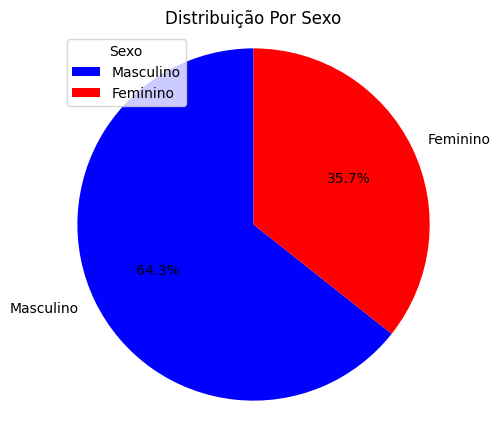

In [ ]:
cores = ['blue', 'red']


plt.figure(figsize=(5,5))
plt.pie(sub_set_sexo, labels=sub_set_sexo.keys(), autopct='%1.1f%%', colors=cores, startangle=90)
plt.title('Distribuição de Sexo')
plt.legend(sub_set_sexo.keys(), title="Sexo", loc="upper left")
plt.axis('equal')
plt.title('Distribuição Por Sexo')
plt.show()


In [ ]:
sub_set_sexo_valorpago_fumante =(

  sub_set
  .groupby(by=['SEXO','FUMANTE'])['TOTAL PAGO']
  .sum()

)

sub_set_sexo_valorpago_fumante

SEXO       FUMANTE
Feminino   Nao         977.68
           Sim         593.27
Masculino  Nao        1919.75
           Sim        1337.07
Name: TOTAL PAGO, dtype: float64

Text(0, 0.5, 'Valor Pago')

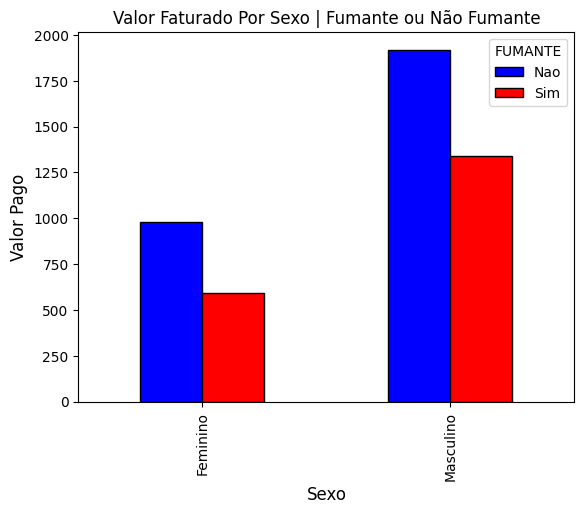

In [ ]:
sub_set_sexo_valorpago_fumante.unstack().plot.bar(color=['blue','red'], ec='k')
plt.title('Valor Faturado Por Sexo | Fumante ou Não Fumante')
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Valor Pago', fontsize=12)
#

Text(0, 0.5, 'Valor Pago')

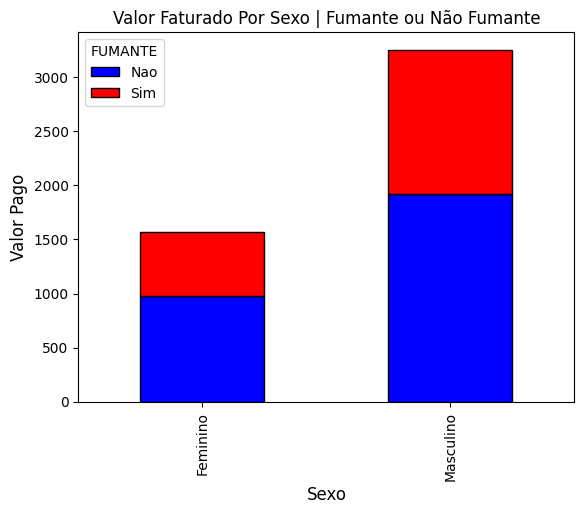

In [ ]:
sub_set_sexo_valorpago_fumante.unstack().plot.bar(color=['blue','red'], ec='k', stacked= True)
plt.title('Valor Faturado Por Sexo | Fumante ou Não Fumante')
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Valor Pago', fontsize=12)
#

In [ ]:
sub_set_sexo_valorpago_diasemana =(

  sub_set
  .groupby(by=['SEXO','DIA SEMANA'])
  .agg(
        TOTAL = ('TOTAL PAGO',np.sum)
      )
  .sort_values(by=['SEXO','DIA SEMANA'],ascending=[True,False])
)
sub_set_sexo_valorpago_diasemana

<ipython-input-27-e8c86ccceb73>:5: FutureWarning: The provided callable <function sum at 0x7ff55124bce0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg(


TOTAL
SEXO      DIA SEMANA         
Feminino  Sex          127.31
          Sab         1085.94
          Dom          357.70
Masculino Sex          198.57
          Sab         1788.79
          Dom         1269.46

Text(0, 0.5, 'Valor Faturado')

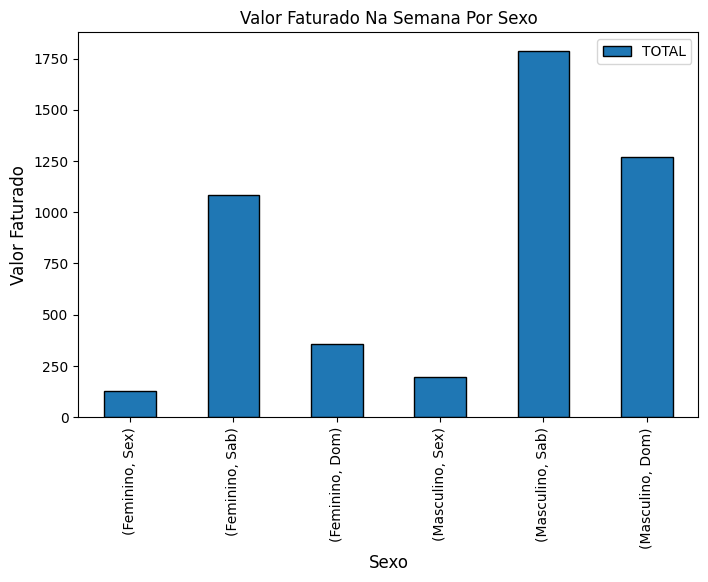

In [ ]:
sub_set_sexo_valorpago_diasemana.plot(kind='bar',figsize=(8,5),ec='k')
plt.title('Valor Faturado Na Semana Por Sexo')
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Valor Faturado', fontsize=12)


In [ ]:
df_selecionado_periodo = sub_set.groupby(by=['PERIODO'])['TOTAL PAGO'].sum()

df_selecionado_periodo

,TOTAL PAGO
PERIODO,
Almoco,1167.47
Jantar,3660.30


Text(0, 0.5, 'Periodo')

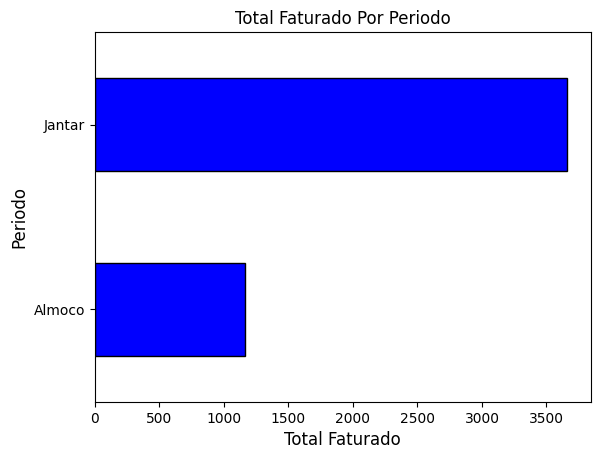

In [ ]:

df_selecionado_periodo.plot.barh(x='PERIODO', y='TOTAL PAGO', color='blue',ec='k')
plt.title('Total Faturado Por Periodo')
plt.xlabel('Total Faturado', fontsize=12)
plt.ylabel('Periodo', fontsize=12)


In [ ]:
df_selecionado_SEXO = sub_set.groupby(by=['SEXO','PERIODO'])['TOTAL PAGO'].sum()

df_selecionado_SEXO

SEXO       PERIODO
Feminino   Almoco      571.87
           Jantar      999.08
Masculino  Almoco      595.60
           Jantar     2661.22
Name: TOTAL PAGO, dtype: float64

Text(0, 0.5, 'Sexo & Periodo')

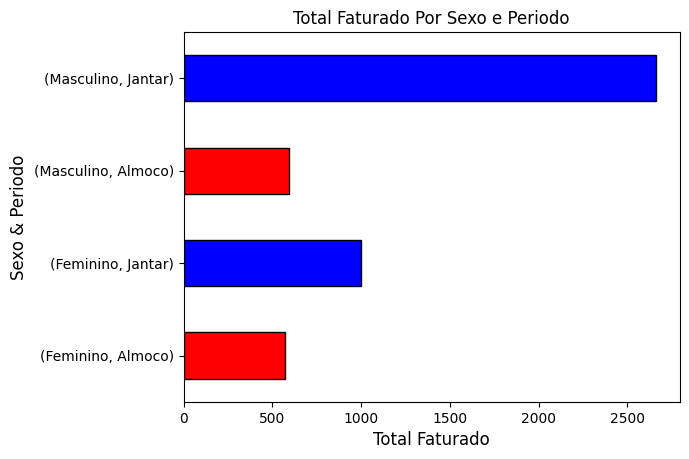

In [ ]:
df_selecionado_SEXO.plot.barh(x=['PERIODO,SEXO'], y='TOTAL PAGO',  color=['red','blue'],ec='k')
plt.title('Total Faturado Por Sexo e Periodo')
plt.xlabel('Total Faturado', fontsize=12)
plt.ylabel('Sexo & Periodo', fontsize=12)

Text(0, 0.5, 'Valor Gorjeta')

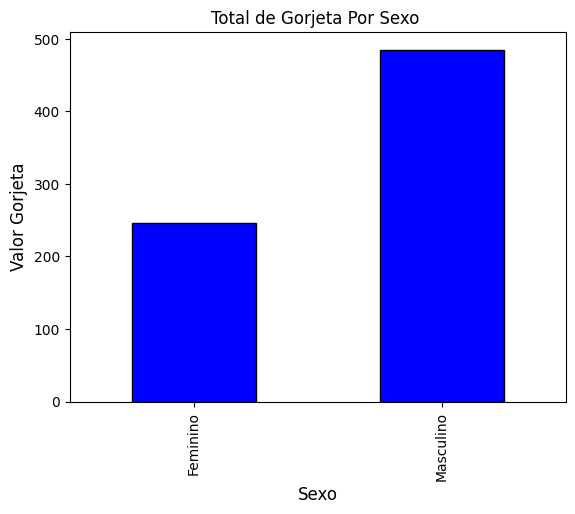

In [ ]:
sub_set_sexo_valorgorjeta = sub_set.groupby('SEXO')['GORJETA'].sum()

sub_set_sexo_valorgorjeta.plot.bar(color='blue', ec='k')
plt.title('Total de Gorjeta Por Sexo ')
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Valor Gorjeta', fontsize=12)

Text(0, 0.5, 'Total Faturado')

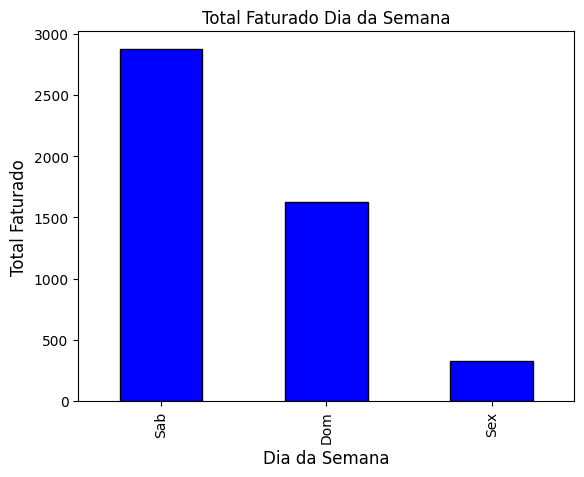

In [ ]:
sub_set_count_semana = sub_set.groupby('DIA SEMANA')['TOTAL PAGO'].sum().sort_values(ascending=False)

sub_set_count_semana.plot.bar(color='blue', ec='k')
plt.title('Total Faturado Dia da Semana')
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Total Faturado', fontsize=12)


In [19]:
sub_set['TOTAL PAGO'].describe()

,TOTAL PAGO
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


Text(0, 0.5, 'Incidencia Faturamento')

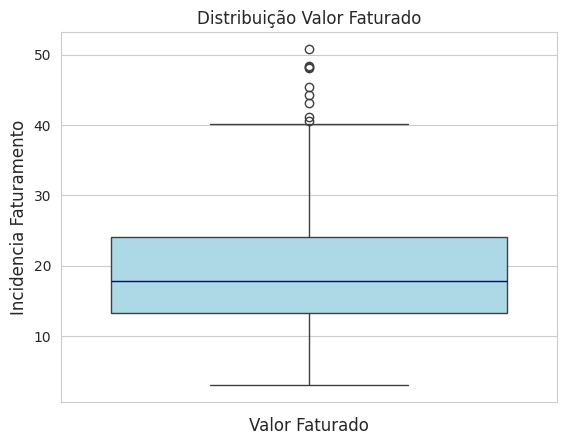

In [23]:
sns.set_style("whitegrid")
sns.boxplot(sub_set['TOTAL PAGO'], boxprops=dict(facecolor='lightblue'),
                medianprops=dict(color='darkblue'))
plt.title('Distribuição Valor Faturado')
plt.xlabel('Valor Faturado', fontsize=12)
plt.ylabel('Incidencia Faturamento', fontsize=12)

